In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Latex
import scipy as sc
import sympy as sp
plt.style.use('rose-pine-moon')
%matplotlib inline

### 1.0 Introduction

In the discrete case, the number of outcomes in the support can be either *finite or countably infinite*. 
<br><br>For probability distributions of continuous random variables the support contains an *infinite interval of possible outcomes*. <br><br>Example: weight of a person in kilograms, the amount of rain in meters etc. All of this measurements are limited by the precision of the measuring intstrument and can take infinite different values.


### 2. Continuous Random Variable

#### 2.1 Probability Density Functions

**Probability Density Function** is a function which have the following properties:
1. The **probability** that *X* is between *a* and *b* is the are under the curve between *a* and *b*.
<br><br>$\displaystyle P(a\leq X \leq b) = \int_a^bf(x)\;dx$.<br><br>

2. The **probability Density** cannot be negative. <br><br>$ f(x) \geq 0,\forall x \in S$.<br><br>

3. The **total area** under the curve must be 1. 
<br><br>$\displaystyle \int_{-\infty}^{\infty} f(x)\;dx = 1$.<br><br>

##### 2.1.1 Recognizing PDFs

In [2]:
def f1(x):
    temp = []
    for i in x:
        if i>=0 and i<=4:
            temp.append(-0.2*i + 0.6)
        else:
            temp.append(0)
    return temp

def f2(x):
    temp = []
    for i in x:
        if i>=0 and i<=4:
            temp.append(-0.3/4*i + 0.3)
        else:
            temp.append(0)
    return temp

def f3(x):
    temp = []
    for i in x:
        if i>=0 and i<=4:
            temp.append(0.1*i + 0.1)
        else:
            temp.append(0)
    return temp

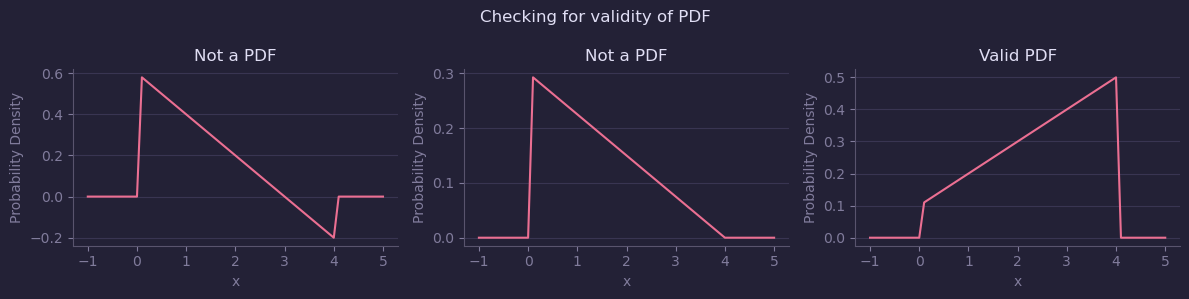

In [3]:
t = np.arange(-1, 5.1, 0.1)

fig = plt.figure(figsize=(12, 3), tight_layout=True)
fig.suptitle('Checking for validity of PDF')
for i in range(0, 3):
    ax = fig.add_subplot(1,3,i+1)
    if i == 0:
        ax.plot(t, f1(t))
        ax.set_title('Not a PDF')
    elif i == 1:
        ax.plot(t, f2(t)) 
        ax.set_title('Not a PDF')
    elif i ==2:
        ax.plot(t, f3(t))
        ax.set_title('Valid PDF')
        
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')

**Observations**:
1. Plot 1 : negative probability densities.
2. Plot 2 : probability density with area = $0.6 \neq 1$
3. Plot 3 : since area = 1 and probability densities are positive, it is a valid PDF.

##### 2.1.2 Calculating Probabilites

$f(x) = \begin{cases}
\frac{1}{24}(x^2+1) & 1\leq x \leq 4 \\
0 & \text{otherwise}
\end{cases}$

Calculate:
1. $P(X=3)$
2. $P(2\leq X \leq 3)$

Solution:
1. Since area of a line is 0 so P(X=3) = 0.

2. $\displaystyle P(2\leq X \leq 3) = \int_2^3\frac{1}{24} (x^2 + 1)\;dx$

In [4]:
x = sp.symbols('x')
f = sp.Piecewise(
    (1/24*(x**2 + 1), (x>=1)&(x<=4)),
    (0, (x<=1) | (x>=4))
    )
display(Latex(r'$P(2\leq X \leq 3) = $'))
print(sp.integrate(f, (x, 2, 3)))

<IPython.core.display.Latex object>

0.305555555555556


Note if X has been a discrete random variable than $P(X=3) = P(2\leq X \leq 3)$, but that is not the case for continuous random variable.

#### 2.2 Cumulative Distribution Functions

The cumulative distribution function ("c.d.f.") of a continuous random variable *X* is defined as:<br><br>
$\displaystyle F(x) = \int_{-\infty}^{x}f(t)dt$
<br><br>for $-\infty <x< \infty$

In [5]:
print(f'F(0.5<x<1): {sp.integrate(f)}')

F(0.5<x<1): Piecewise((0, x <= 1), (0.0138888888888889*x**3 + 0.0416666666666667*x - 0.0555555555555556, x <= 4), (1.0, True))


The cumulative distribution function is defined as:<br><br>
$F(x) = 
\begin{cases}
0,\;x \leq 0 \\
x^3,\; 0<x<1 \\
1,\; x \geq 1
\end{cases}
$

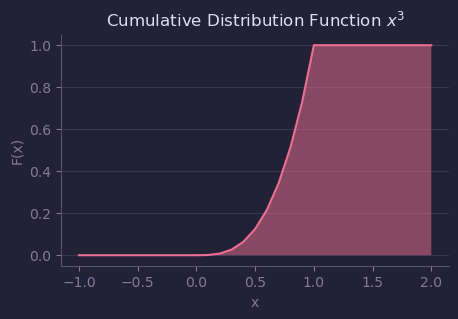

In [6]:
def F(x):
    temp = []
    for i in x:
        if i <= 0:
            temp.append(0)
        elif i>0 and i<1:
            temp.append(i**3)
        elif i >= 1:
            temp.append(1)
    return temp
x = np.linspace(-1, 2, 31)


fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
ax.plot(x, F(x))
ax.fill_between(x, F(x), alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_title('Cumulative Distribution Function $x^3$');

##### 2.2.1 Conversion of  PDF to CDF

Probability distribution functions can be converted to Cumulative distribution functions using:<br><br>
$\displaystyle F(x_0) = P(X<x_0) = \int_{-\infty}^{x_0} f(x)dx$

Example1: <br><br>
$f(x) = \begin{cases}
\frac{1}{8}x^2 & 0<x\leq 2 \\
\frac{1}{8}x(4-x) & 2\leq x <4 \\
0 & \text{otherwise}
\end{cases}
$

In [7]:
def f(x):
    temp = []
    for i in x:
        if i >= 0 and i < 2:
            temp.append(1/8 * i**2)
        elif i >= 2 and i < 4:
            temp.append(1/8 * i * (4-i))
        else:
            temp.append(0)
    return temp

Text(4, 0.1, 'R3')

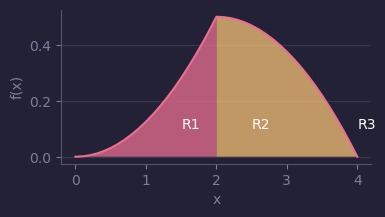

In [8]:
t = np.arange(0, 4.1, 0.1)
fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1,1,1)
ax.plot(t, f(t))
ax.fill_between(t[:21], 1/8*t[:21]**2, alpha=0.75)
ax.fill_between(t[20:], 1/8*t[20:]*(4-t[20:]), alpha=0.75)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.text(1.5, 0.1, 'R1', color='snow')
ax.text(2.5, 0.1, 'R2', color='snow')
ax.text(4, 0.1, 'R3', color='snow')

For $x_0$ in R1 (red region): $\displaystyle F(x_0) = \int_0^{x_0}\frac{1}{8}x^2 dx$
<br><br>For $x_0$ in R2 (sum of red and yellow regions):<br><br> 
$\displaystyle F(x_0) = F(2) + \int_2^{x_0}\frac{1}{8}x(4-x)$
<br><br>For $x_0$ in R3 (sum of red and yellow regions and blank region):<br><br>
$\displaystyle F(x_0) = F(4) + \int_4^{\infty} 0 dx$

In [9]:
f = sp.Piecewise(
    (1/8*x**2, (x>=0)&(x<=2)),
    (1/8*x*(4-x), (x>=2)&(x<=4)),
    (0, (x<=0)|(x>=4))
)
F = sp.integrate(f)
print(f'F(x)')
display(F)

TypeError: Argument must be a Basic object, not `ndarray`

In [106]:
print(f'F(4): {F.subs({x:4})}')

F(4): 1.00000000000000


##### 2.2.2 Conversion of CDF to PDF

Cumulative distribution functions can be converted to Probability distribution functions using:<br><br>
$\displaystyle f(x) = \frac{dF(x)}{dx}$

In [43]:
f = sp.Piecewise(
    (sp.diff(F_r1), (x0 >= 0)&(x0 < 2)),
    (sp.diff(F_r2), (x0 >= 2)&(x0 < 4))
) 
display(f)

Piecewise((0.125*x0**2, (x0 >= 0) & (x0 < 2)), (-0.125*x0**2 + 0.5*x0, (x0 >= 2) & (x0 < 4)))

##### 2.2.3 Recognising CDFs

A Cumulative distribution function must statisy following conditions:
- As *x* increases, *F(x)* increases from 0 to 1.
- *F* is a continuous, that is a small increase in *x* cannot produce a sudden jump in the value of *F(x)*.

In [83]:
def f1(x):
    temp = []
    for i in x:
        if i < 0:
            temp.append(-0.5*i)
        elif i >0 and i < 1:
            temp.append(i)
        elif i >= 1:
            temp.append(1.5-0.5*i)
    return temp

def f2(x):
    temp = []
    for i in x:
        if i > 0 and i < 0.5:
            temp.append(0.5*i)
        elif i > 0.5 and i < 1.0:
            temp.append(i)
        else:
            temp.append(0)
    return temp

def f3(x):
    temp = []
    for i in x:
        if i > 0 and i < 1:
            temp.append(i**2)
        else:
            temp.append(0)
    return temp

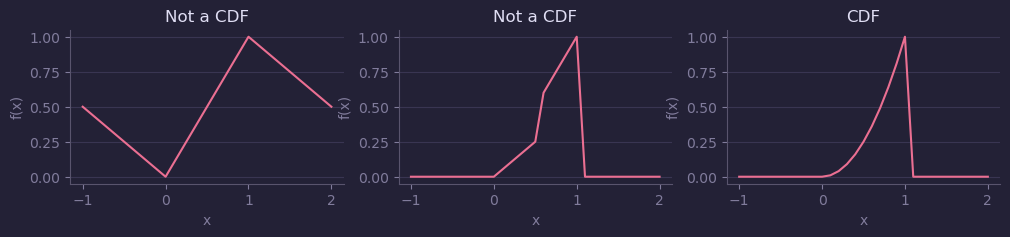

In [86]:
t = np.arange(-1, 2.1, 0.1)
fig = plt.figure(figsize=(12,2))

for i in range(1, 4):
    ax = fig.add_subplot(1,3,i)
    if i == 1:
        ax.plot(t, f1(t))
        ax.set_title('Not a CDF')
    elif i == 2:
        ax.plot(t, f2(t))
        ax.set_title('Not a CDF')
    elif i == 3:
        ax.plot(t, f3(t))
        ax.set_title('CDF')

    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')

- Figure 1 is not a plot of CDF as it is not bound in range [0,1] and also it is not always increasing.
- Figure 2 is not a plot of CDF as there is a sudden jump at 0.5
- Figure 3 is a plot of CDF as it follows both the conditions of monotonically increasing and continuity.

#### 2.3 Mean and Variance

*Mean* of a Continuous Random Variable:<br><br>
$\displaystyle \mu = \int_{-\infty}^{\infty} xf(x)dx$

*Varaince* of a Continuous Random Variable:<br><br>
$\displaystyle \sigma^2 = \int_{-\infty}^{\infty} x^2f(x)dx - \mu^2$

Example1: <br><br>
$ f(x) = \begin{cases}
\frac{3}{10}(3x-x^2) & 0 \leq x \leq 2 \\
0 & \text{otherwise} \\
\end{cases}
$

In [104]:
x = sp.symbols('x')
f = sp.Piecewise((3/10*(3*x-x**2), (x>=0) & (x<=2)), (0, (x<=0) | (x>=2)))

mean = sp.integrate(x*f, (x, -sp.oo, sp.oo))
variance = sp.integrate(x**2*f, (x, -sp.oo, sp.oo)) - mean**2

print(f'Mean of X: {mean:.4f}\nVariance of X: {variance:.4f}')

Mean of X: 1.2000
Variance of X: 0.2400


Example2: <br><br>
$f(x) = \begin{cases}
\frac{1}{4}x & 0<x\leq 2 \\
\frac{1}{4}(4-x) & 2\leq x <4 \\
0 & \text{otherwise}
\end{cases}
$
<br><br>Calculate:
1. Mean
2. Variance
3. $P(X<\mu-\sigma)$
4. $P(|X-\mu| < \sigma)$

In [5]:
x = sp.symbols('x')
f = sp.Piecewise(
    (1/4*x , (x>0) & (x<=2)),
    (1/4*(4-x) , (x>=2) & (x<4)),
    (0, (x<0) | (x>=4))
)

mean = sp.integrate(x*f, (x, -sp.oo, sp.oo))
variance = sp.integrate(x**2*f, (x, -sp.oo, sp.oo)) - mean**2

Px = sp.integrate(f, (x, 0, mean -variance**0.5))
print(
    f'1. Mean: {mean}',
    f'\n2. Variance: {variance}'
    f'\n3. P(X< [mean - std]): {Px}'
)

1. Mean: 2.00000000000000 
2. Variance: 0.666666666666666
3. P(X< [mean - std]): 0.175085042869470


4. Simplifying the expression: <br><br>
$\Rightarrow \lvert X - \mu \rvert < \sigma \\[1em]
\Rightarrow -\sigma < X - \mu < \sigma \\[1em]
\Rightarrow \mu - \sigma < X < \mu + \sigma
$
<br><br>Now we calculate the values to get bounds of integrals

In [7]:
print(f'mean - std: {mean-variance**0.5}\nmean + std: {mean+variance**0.5}')

mean - std: 1.18350341907227
mean + std: 2.81649658092773


So the integral will be split into two integrals with 2 as the inbetween bound.

In [8]:
Px2 = sp.integrate(1/4*x, (x,mean-variance**0.5, 2)) + sp.integrate(1/4*(4-x), (x, 2, mean+variance**0.5))
print(f'P(|X-mean|<std): {Px2}')

P(|X-mean|<std): 0.649829914261059


#### 2.4 Median

For a cumulative distribution function F(x) with median M: <br><br>
$F(m) = \frac{1}{2}$

Example:<br><br>
$F(x) = \begin{cases}
0 & x<0 \\
\frac{1}{12}x^2 & 0\leq x\leq 2 \\ 
\frac{1}{3}(x-1) & 2\leq x\leq 4 \\
1 & x>4
\end{cases}$
<br><br>
Looking at the limits we can see the median can be either between [0,2] or [2,4]. So we equate both functions to 0.5 and check if *m* falls in the corresponding range.

In [12]:
f1 = 1/12*x**2 
print(sp.solve(f1 - 0.5, x))

[-2.44948974278318, 2.44948974278318]


Since the values of *m* does not fall in [0,2], this is not the median.

In [13]:
f2 = 1/3*(x-1)
print(sp.solve(f2-0.5, x))

[2.50000000000000]


Since 2.5 is in the range of [2,4], it is the actual median.

##### 2.4.1 Percentile

Intuitively to find any percentile of x we can equate the cumulative distribution function to percentile:<br><br>
$F(d_p) = \frac{p}{100}$

#### 2.5 Mode

Mode is the the value of $x_0$ for which probability density function $f(x)$ has highest value. That is *mode is the  global maxima of probrability density function in the defined region*.

Example: <br><br>
$f(x) = \begin{cases}
\frac{3}{64}x^2(4-x) & 0\leq x \leq 4 \\
0 & \text{otherwise}
\end{cases}$

We calculate the maxima using $f'(x_0) = 0$

In [16]:
f = 3/64*x**2*(4-x)
x0 = sp.solve(sp.diff(f,x), x)
print(f'Mode: {x0}')

Mode: [0.0, 2.66666666666667]


Example:<br><br>
$f(x) = \begin{cases}
\frac{2}{25}x(4-x) & 0\leq x \leq 3 \\
\frac{2}{25}{x} & 3\leq x \leq 4 \\
0 & \text{otherwise}
\end{cases}$

In this case we have find maximum in each region as well as evaluate at intervals.
For 2nd interval the derivative is $\frac{2}{25}\neq 0$, so there is no maximum in the region.

In [52]:
f = sp.Piecewise(
    (2/25*x*(4-x), (x>=0)&(x<=3)),
    (2/25*x, (x>=3)&(x<=4)),
    (0, (x<=0) | (x>=4))
)
bound_vals = [f.subs({x:i}) for i in(0,3,4)]
bound_vals

[0, 0.240000000000000, 0.320000000000000]

In [62]:
x0 = [sp.solve(sp.diff(f.args[i][0])) for i in range(2)]
print(f'interval maxima: {x0}')

interval maxima: [[2.00000000000000], []]


In [64]:
interval_vals = f.subs({x:2})
print(f'Bound values of f(x): {bound_vals}',
      f'\nInterval maxima values of f(x): {interval_vals}')

Bound values of f(x): [0, 0.240000000000000, 0.320000000000000] 
Interval maxima values of f(x): 0.320000000000000


We have two modes since f(x) attains maximum of 0.32 at two points : {2, 4}

### 3. Uniform Distribution

#### 3.1 Definition

For the uniform distribution, $f(x)$ is constant over the possible values of $x$. The probability distribution function of uniform distribution function is defined as: <br><br>
$ f(x) = \begin{cases}
\frac{1}{b-a} & \text{for}\; a\leq x\leq b\\
0 & \text{otherwise}
\end{cases}$

Cumulative distribution function:<br><br>
$\displaystyle F(x_0) = \int_{-\infty}^{x_0}f(x)dx = \frac{x_0 - a}{b-a}$

#### 3.2 Mean

We know mean = $\displaystyle \mu =\int_{-\infty}^{\infty}xf(x)dx =  \int_a^b x\frac{1}{b-a}dx$

In [82]:
x = sp.symbols('x',real='True')
a,b = sp.symbols('a,b',constant=True)
mean = sp.integrate(x*1/(b-a),(x, a, b)).simplify()
display(mean)

a/2 + b/2

#### 3.3 Variance

We know Variance = $\displaystyle \sigma^2 =\int_{-\infty}^{\infty}x^2f(x)dx - \mu^2$

In [84]:
var = (sp.integrate(x**2*1/(b-a),(x, a, b)) - mean**2).simplify()
display(var)

a**2/12 - a*b/6 + b**2/12

$\sigma^2 = \frac{(b-a)^2}{12}$

#### 3.4 Example

We have uniform distribution function defined by U(200,250). Compute followning:
1. P.D.F., f(x)
2. P(X>230)
3. What is 20th percentile of this distribution

In [109]:
x = sp.symbols('x')
f = sp.Piecewise(
    (1/(250-200), (x>=200)&(x<=250)),
    (0, (x<=200)|(x>=250))
)
print('f(x):')
display(f)

f(x):


Piecewise((0.02, (x >= 200) & (x <= 250)), (0, (x >= 250) | (x <= 200)))

In [110]:
print(f'P(X>230): {(250-230)/(250-200)}')

P(X>230): 0.4


In [111]:
F = sp.integrate(f, x)
print('F(x)')
display(F)

F(x)


Piecewise((0, x <= 200), (0.02*x - 4.0, x <= 250), (1.0, True))

As discussed before percentile is equal to CDF $F(x_p) = p$

#### 3.5 Quantile-Quantile Plot

A **quantile-quantile plot or qq-plot**, is a graphical tool for assesing whether a set of observed values come from a specific probability distribution. In qq-plot:
- *Theoretical quantiles* are plotted on *X-axis*.
- *Sample qunatiles* are plotted on *Y-axis*.
- If the *theoretical distribution* is a good fit for the data, then the $y=x$ should be a good fit for the qq-plot.

Construction details:<br>
To construct the *sample quantiles* of a set of size *n*:
- Order the data from highest to lowest
- The *r*th value from bottom is considered the $(\frac{r}{n+1})^{th}$ sample quantile.
- The corresponding **theoretical quantiles** are computed by applying the inverse cumulative distribution function to these values.

*Example*: 
- We randomly sample data from U[0,1] and from N[0,1] for comparision purposes.
- Sort are samples.
- Use Inverse C.D.F for U[a,b] = $F(x_p)(b-a) + a$. where $F(x_p)$ is percentile value, to get thoretical percentiles.


In [25]:
a, b = 0, 1
n = 20

samples = np.random.uniform(a,b,size=(n,)) 
# 
samples2 = np.random.normal(a,b, (n,))

# 1. Ordering Data
samples = np.sort(samples)
samples2 = np.sort(samples2)

# 2. Theoretical qunatiles
theoretical_quantiles = np.linspace(0,1, n)*(b-a) + a

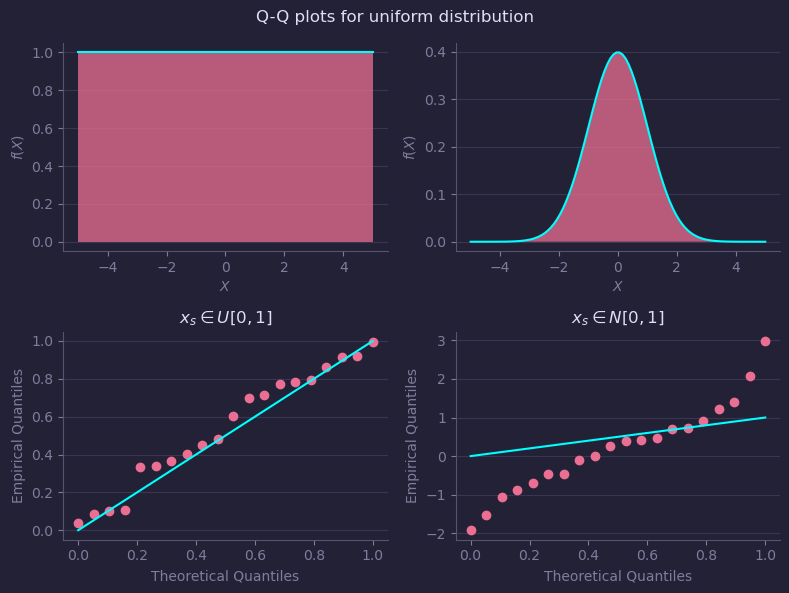

In [53]:
normal_pdf = lambda x, loc, scale: 1/(scale*(2*np.pi)**0.5) * np.exp(-0.5*((x-loc)/(scale))**2)
t = np.linspace(-5,5,100)

fig = plt.figure(figsize=(8,6), tight_layout=True)
fig.suptitle('Q-Q plots for uniform distribution')
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    if i>=1 and i <=2:
        ax.set_xlabel('$X$')
        ax.set_ylabel('$f(X)$')
        if i == 1:
            ax.plot(t, np.ones_like(t)/(b-a), color='cyan')
            ax.fill_between(t, np.ones_like(t)/(b-a), alpha=0.75)
        elif i == 2:
            ax.plot(t, normal_pdf(t, a, b), color='cyan')
            ax.fill_between(t, normal_pdf(t,a,b), alpha=0.75)
    elif i > 2 and i <=4:
        ax.plot(theoretical_quantiles, theoretical_quantiles, color='cyan')
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Empirical Quantiles')
        if i == 3:
            ax.scatter(theoretical_quantiles, samples)
            ax.set_title(r'$x_s \in U[0,1]$')
        elif i == 4:
            ax.scatter(theoretical_quantiles, samples2)
            ax.set_title(r'$x_s \in N[0,1]$')

**Observations**:
- The *quantiles* of data sampled from *uniform distribution* is closely related to *theoretical quantiles* of *uniform distribution*. This can be seen by the scattered data following the line $y=x$.
- The *quantiles* of data sampled from *normal distribution* is not closely related to *theoretical quantiles* of *uniform distribution*. This can be seen by the scattered data diverging from line $y=x$.
- The divergence in the qq-plot of normal sample quantiles and theoretical uniform quantiles is due to the the normal distribution being good approximation of uniform distribution near mean but falling at its tails.

### 4. Exponential Distribution

#### 4.1. Definition

The exponential distribution models the waiting time between events that occur randomly and indepently.

For example: calls to delivery resutrant, production of defective products in a factory etc.

#### 4.2 Cumulative Distribution Function

Cumulative Distribution Function of exponential distribution is give as:

$$F(x) = 1 - e^{-\frac{x}{\theta}}$$

where $\theta = \frac{1}{\lambda}$. 

It happens to be that $\theta$ is *mean* of Exponential distribution, while $\lambda$ is *mean* of Poisson distribution.

In [29]:
def get_poisson_probabilities(l, n=11):
    probs = []
    for x in range(n):
        probs.append(l**x * math.exp(-l)/math.factorial(x))
    return probs

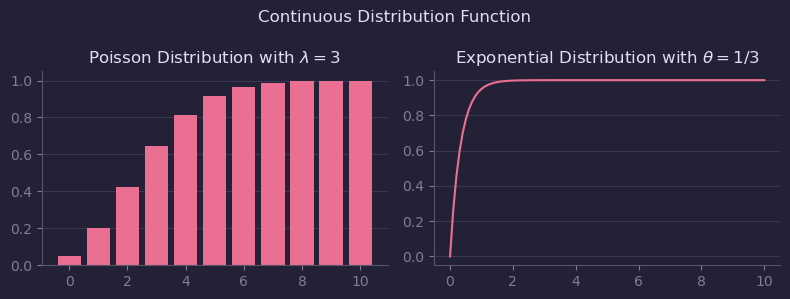

In [39]:
l = 3
x = np.linspace(0,10,100)
fig = plt.figure(figsize=(8,3), tight_layout=True)
fig.suptitle('Continuous Distribution Function')
for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i == 1:
        ax.bar(np.linspace(0,10,11),  np.cumsum(get_poisson_probabilities(l)))
        ax.set_title(r'Poisson Distribution with $\lambda = 3$')
    elif i == 2:
        ax.plot(x, 1-np.exp(-x*l))
        ax.set_title(r'Exponential Distribution with $\theta = 1/3$')

#### 4.3 Probability Density Function

Probability Density function can be obtained by differentiating CDF:
$$f(x) = \frac{1}{\theta}e^{\frac{-x}{\theta}}$$

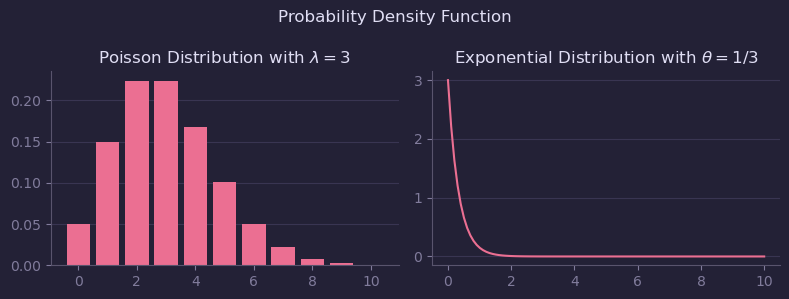

In [41]:
l = 3
x = np.linspace(0,10,100)
fig = plt.figure(figsize=(8,3), tight_layout=True)
fig.suptitle('Probability Density Function')
for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i == 1:
        ax.bar(np.linspace(0,10,11),  get_poisson_probabilities(l))
        ax.set_title(r'Poisson Distribution with $\lambda = 3$')
    elif i == 2:
        ax.plot(x, l*np.exp(-x*l))
        ax.set_title(r'Exponential Distribution with $\theta = 1/3$')

#### 4.4 Mean and Variance

Mean is given as:
$$\mu = \int_{-\infty}^{\infty} xf(x)\;dx$$

In [23]:
x,t, = sp.symbols('x,t', is_positive=True)
theta = sp.symbols('theta', constant=True, is_positive=True)
f = 1/theta * sp.exp(-x/theta)
Ex1 = sp.integrate(x*f, (x, 0, sp.oo)).simplify()
display(Ex1)

Piecewise((theta, Abs(arg(theta)) < pi/2), (Integral(x*exp(-x/theta), (x, 0, oo))/theta, True))

We will take the defined integral as mean:<br><br>
$\mu = \theta$

And variance is given as:
$$\sigma^2 = \int_{-\infty}^{\infty} x^2f(x)\;dx$$

In [17]:

Ex2 = sp.integrate(x**2*f, (x, 0, sp.oo)).simplify()
display(Ex2)

Piecewise((2*theta**2, Abs(arg(theta)) < pi/2), (Integral(x**2*exp(-x/theta), (x, 0, oo))/theta, True))

We use the defined integral as the variance:<br><br>
$\sigma^2 = 2\theta^2$

#### 4.5 Moment Generating Function

- Moment Generating function:<br><br>
$\displaystyle M(t) = E(e^{tX}) = \int_0^{\infty}e^{tx} (\frac{1}{\theta})e^{-x/\theta}dx$

In [24]:
Mt = sp.integrate(sp.exp(t*x)*f, (x,0, sp.oo))
display(Mt)

Piecewise((-1/(t*theta*(1 - 1/(t*theta))), ((Abs(arg(theta)) <= pi/2) & (Abs(arg(t) + pi) < pi/2)) | ((Abs(arg(theta)) < pi/2) & (Abs(arg(t) + pi) <= pi/2)) | ((Abs(arg(theta)) < pi/2) & (Abs(arg(t) + pi) < pi/2))), (Integral(exp(t*x)*exp(-x/theta)/theta, (x, 0, oo)), True))

Again the MGF is where integral is defined:

$\displaystyle M(t) = \frac{1}{1-t\theta}$

#### 4.6 Median

**Median** of exponential distribution:<br><br>
$\displaystyle
\Rightarrow F(x_m) = 0.5 \\[1em]
\Rightarrow 1-e^{-\frac{x_m}{\theta}} = 0.5\\[1em]
\Rightarrow e^{-\frac{x_m}{\theta}} = 0.5 \\[1em]
\Rightarrow -\frac{x_m}{\theta} = \ln(0.5) \\[1em]
\Rightarrow x_m = \theta \ln(2)
$
<br><br>Since $\ln(2) < 1$, the median of an exponential distribution is less than its mean.

#### 4.7 Memoryless

Conditions for a distribution to be Exponential:
- Events must occur at a constant rate
- Events must be independent of each other.

Whenever this two conditions are followed the property is known as *memoryless*. Mathematically:

$$\begin{align*}
P(X>x+y | X>x) 
&= \frac{P(X>x+y) \cap P(X>x)}{P(X>x)} \\
& = \frac{P(X>x+y)}{P(X>x)} \\
& = \frac{f(x+y)}{f(x)} \\
& = \frac{\lambda e^{-\lambda(x+y)}}{\lambda e^{-\lambda(x)}} \\
&= e^{-\lambda y}
\end{align*}
$$

Consider we are buying bulb and we know their lifetime follow exponetial distribution. Than if we were asked to predict that bulb will die out next day then,
- the probabilty of new bulb dying out would be equal to
- the probability of a used bulb dying out.

Visualizing Procedure:
- Visualising complete exponential distrinution
- Visulising exponential distribution for X>1.
- Visualising normalised probability densities for X>1.

Formula for min-max scaling:
$\displaystyle x_{min-max} = \frac{x - x_min}{x_max - x_min} \times (x'_{max} - x'_{min}) + x'_{min}$, <br><br>
where $x'_{max}, x'_{min}$ are new maximum and minimum.

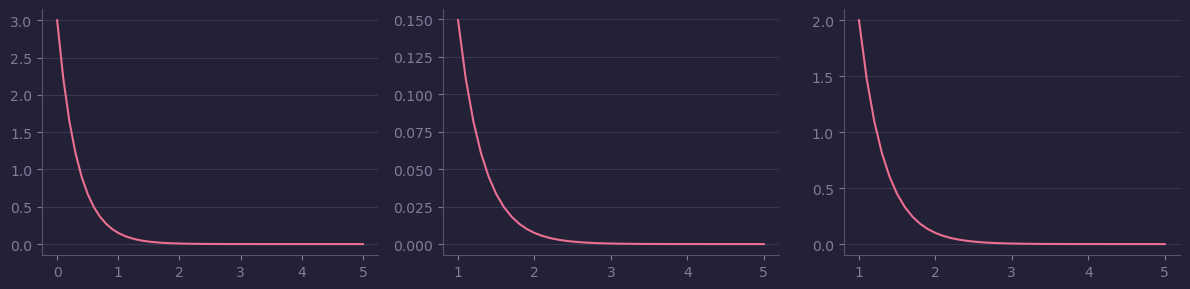

In [82]:
l = 3
t = np.arange(0, 5.1, 0.1)
f1 = l*np.exp(-l*t[10:])
f1_normalised = (f1 - f1.min())/(f1.max() - f1.min()) * (2-0)

fig = plt.figure(figsize=(12,3), tight_layout=True)
for i in range(0, 4):
    ax = fig.add_subplot(1,3,i+1)
    if i == 1:
        ax.plot(t, l*np.exp(-l*t))
        ax.set_title(f'Exponential Distribution of ')
    elif i == 2:
        ax.plot(t[10:], l*np.exp(-l*t[10:]))
    elif i == 3:
        ax.plot(t[10:], f1_normalised)

Observation:
- The shape of orignal distribution $P(X\geq 0)$ and for distributition corresponding to normalised values of $P(x\geq 1)$ is same.
- The older events do not affect the distribution of futur events, the normalised shape of new probabilities will remain same.

#### 4.8 Example

Example: The average click rate of a site is 3 per hour. What is the probability the next visitor arrives:
1. within 10 mins
2. after 30 mins have passed
3. exactly at 15 mins time.

Solution: Mean of distribution is $\theta = 1/3$ per hours. For simpler calculations we convert into per minutes basis $\theta = \frac{60}{3} = 20$ per mins.
1. $P(X<10) =  F(10) = 1-e^{\frac{-10}{\theta}}$

In [49]:
print(f'Probability that next visitor arrives within 10 mins: {1-np.exp(-10/20):.4f}')

Probability that next visitor arrives within 10 mins: 0.3935


2. $P(X>30) = 1 - (1-e^{\frac{-30}{\theta}}) = e^{\frac{-30}{\theta}}$

In [50]:
print(f'Probability that next visitor arrives after 30 mins: {np.exp(-30/20):.4f}')

Probability that next visitor arrives after 30 mins: 0.2231


3. $P(X=15) = 0$, since it is continuous distribution.

In [ ]:
print(f'Probability that next visitor arrives exactly at 20: {1/20 * np.exp(-15)}')

### 5. Gamma Distibution

#### 5.1 Gamma Function

Note that factorials : $n! = n(n-1)(n-2)\dots 2.1$ is only defined for $n=1,2,\dots$ (whole numbers). Gamma functions extend this to continuous scale.

$$\displaystyle \Gamma(x) = \int_0^{\infty} t^{(x-1)} e^{-t} dt = (x-1)!$$

In [6]:
sc.special.gamma(2.3)

np.float64(1.1667119051981603)

In [2]:
t = sp.symbols('t', is_positive=True)
sp.integrate(t**(2.3-1)*sp.exp(-t), (t, 0, sp.oo))

1.16671190519816

#### 5.2 Gamma Distribution

The **gamma distribution** is a continuous probability distribution used to model the times that elapses before $\alpha$ occurences of a randomly occuring event.

Just as we derived CDF first in exponential distribution, we repeat the same.

For gamma distribution 
$$F(x) = 1 - P(\text{fewer than}\; \alpha \;\text{events in [0,x]})$$
that is we need to add up the probabilities of having 0 events occuring, 1 events occuring, ..., $(\alpha-1)$ events occuring in [0,x]. Well that just involves the probability mass function of a Poisson random variable with mean $\lambda x = x/\theta$. That is :
$$ F(x) = 1 - \sum_{k=0}^{\alpha - 1} \frac{(\frac{x}{\theta})^k e^{-x/\theta}}{k!}$$
Differentiating and simplfying CDF gives the PDF as:
$$f(x) = \frac{x^{\alpha-1}e^{-x/\theta}}{(\alpha-1)!\theta^{\alpha}}$$
Since $\alpha$ is not always a whole number the factorial in denominator is replaced by gamma function. So PDF is:
$$f(x) = \frac{x^{\alpha-1}e^{-x/\theta}}{\Gamma(\alpha)\theta^{\alpha}}$$
for $x\geq 0$ and $\alpha, \theta > 0$. 
- $\alpha$ is known as the shape parameter and is the number of events for which we are wating to occur.
- $\theta$ is known as the scale paramter, which the mean waiting time until the first event.

#### 5.3 Effect of Theta and Alpha on the shape of Distribution

##### 5.3.1 Effect of Theta

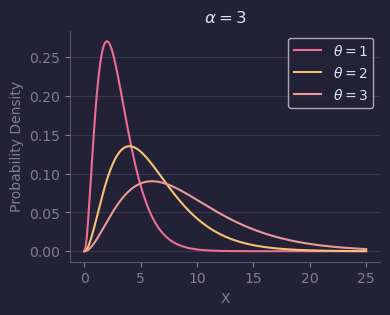

In [14]:
t = np.arange(0, 25.1, 0.1)
alpha = 3

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
for i in range(1,4):
    ax.plot(t,(t**(alpha-1)*np.exp(-t/i))/(sc.special.gamma(alpha)*i**alpha), label = r'$\theta = ${}'.format(i))

ax.set_title(r'$\alpha = 3$')
ax.set_ylabel('Probability Density')
ax.set_xlabel('X')
ax.legend();

Observation:
- For a given number of occurences (3 in our case) the probability of us waiting more is larger for larger mean wating time.

##### 5.3.2 Effect of Alpha

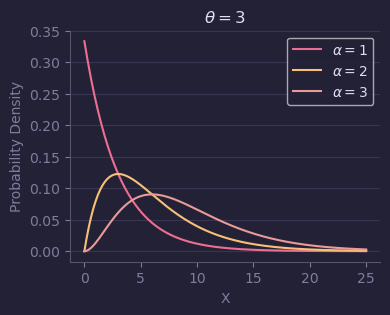

In [16]:
t = np.arange(0, 25.1, 0.1)
theta = 3

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
for i in range(1,4):
    ax.plot(t,(t**(i-1)*np.exp(-t/theta))/(sc.special.gamma(i)*theta**i), label = r'$\alpha = ${}'.format(i))

ax.set_title(r'$\theta = 3$')
ax.set_ylabel('Probability Density')
ax.set_xlabel('X')
ax.legend();

Observation:
- Increasing the number of events between mean time interval, leads to greater probability of us waiting.

#### 5.4 Moment Generating Function

$$M(t) = \frac{1}{(1-\theta t)^{\alpha}}$$
for $t<\frac{1}{\theta}$

#### 5.5 Mean and Variance

Mean : 
$$ \mu = \int_0^{\infty}xf(x)dx$$
Variance:
$$ \sigma^2 = \int_0^{\infty}x^2f(x)dx - \mu^2$$

In [38]:
x = sp.symbols('x', positive=True)
alpha, theta = sp.symbols('alpha, theta', positive=True, constant=True)
f = (sp.exp(-x/theta) * x**(alpha-1)) / (sp.gamma(alpha) * theta**alpha)

mean = sp.integrate(x*f, (x, 0, sp.oo)).simplify()
variance = sp.simplify(sp.integrate(x**2 * f, (x, 0, sp.oo)) - mean**2)

display(Latex(r'$\mu = $'))
display(mean)
display(Latex(r'$\sigma^2 = $'))
display(variance)

<IPython.core.display.Latex object>

alpha*theta

<IPython.core.display.Latex object>

alpha*theta**2

#### 5.6 Example

*Example*: Consider a shuttle has two fuel pump-one active, the other in reserve. Typical mission is expected to require that fuel be pumped for at most 50 hours. According to the manufacturer's specifications, pumps are expected to fail once every 100 hours. What are the chances that such a fuel pump system would not remain functioning for the full 50 hours?

*Solution*:
- We are given the avearge for a Poisson process in interval 100 hour is 1.Therefore, $\theta$, the mean waiting time until first failure is 100 hours.
- Knowing that, let's now let *Y* denote the time elapsed until the $\alpha$ = 2nd pump breaks down. 
- Therefore, the probability that the system fails to last for 50 hours is P(Y<50): 

In [51]:
x = sp.symbols('x', positive=True)
alpha, theta = 2, 100
f = (sp.exp(-x/theta) * x**(alpha-1)) / (sp.gamma(alpha) * theta**alpha)
display(Latex(r'$P(Y<50) = $'))
display(float(sp.integrate(f, (x, 0, 50)).simplify()))

<IPython.core.display.Latex object>

0.09020401043104986

#### 5.7 Special Cases

The gamma distribution has two particularly important special cases
- When $\alpha = 1$, we have *exponential distribution*, which models the waiting time between occurrences in a Poisson process. The pdf of that distribution is:
$$f(x) = \frac{1}{\theta}e^{-x/\theta}$$

- When $\theta = 2$ and $\alpha = \frac{r}{2}$, where *r* is a positive integer, we have $\chi$-squared distribution with *r* degrees of freedom which models the sum of squares of *r* random variables, each with standard normal distribution. The pdf of that distribution is:
$$f(x) = \frac{x^{r/2 - 1} e^{=x/2}}{\Gamma(r/2) 2^{r/2}}

### 6. Normal Distribution

#### 6.1 Definition

The continuous random variable follows a normal distribution if its probability density function is defined as:
$$f(x) = \frac{1}{\sigma \sqrt{2\pi}}\exp \left\{ -\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2 \right\}$$
for $-\infty < x < \infty$, $-\infty < \mu < \infty$ and $0<\sigma < \infty$. The **mean** of *X* is $\mu$ and the **variance** of *X* is $\sigma^2$. We say $X \sim N(\mu, \sigma^2)$.

##### 6.1.1. Example

Let *X* denote the IQ of a randomly selected person. It has been empirically known that *X* follows a normal distribution with mean 100 and standard deviation of 16.
<br>That is $X\sim N(100, 16^2)$

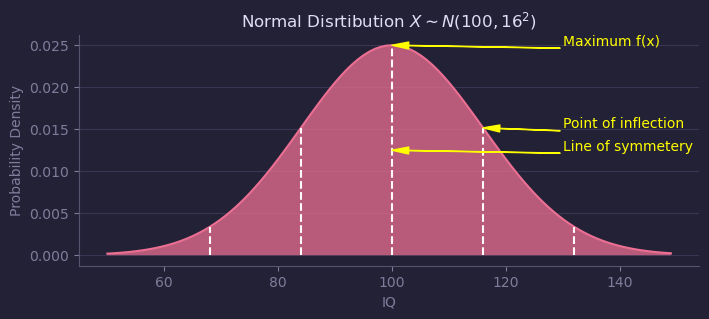

In [79]:
f = lambda x, mean, std: 1/(std*(2*np.pi)**0.5) * np.exp(-0.5*((x-mean)/std)**2)
mean = 100
std = 16

t = np.arange(50, 150)
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,1,1)
ax.plot(t, f(t, mean, std))
ax.fill_between(t, f(t, mean, std), alpha=0.75)
ax.plot([mean]*2,[0,f(mean, mean, std)], ls='--', color='snow')

for i in range(1, 3):
    ax.plot([mean - i * std]*2,[0,f(mean - i * std, mean, std)], ls='--', color='snow')
    ax.plot([mean + i * std]*2,[0,f(mean + i * std, mean, std)], ls='--', color='snow')

# annotations
ax.annotate('Maximum f(x)', xy=(100, f(mean, mean, std)), xytext=(130, f(mean, mean, std)), color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})
ax.annotate('Point of inflection', xy=(mean+std, f(mean + std, mean, std)), xytext=(130, f(mean +std, mean, std)), color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})
ax.annotate('Line of symmetery', xy=(100, f(mean, mean, std)/2), xytext=(130, f(mean, mean, std)/2), color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})

# figure properties
ax.set_xlabel('IQ')
ax.set_ylabel('Probability Density')
ax.set_title(r'Normal Disrtibution $X\sim N(100, 16^2)$');

Charactersics:
- All normal curves are **bell-shaped**
- All normal curves are **symmetric** about the **mean** $\mu$.
- The maximum height is maximized at mean, that is mean = mode.

#### 6.2 Standardizing Normal Distribution

If $X\sim N(\mu,\sigma^2)$, then:
$$Z = \frac{X-\mu}{\sigma}$$
follows the $N(0,1)$ distribution, which is called the **standardized or standard normal distribution**. The new obtained probabilites are referred to as **z-score**.

##### 6.2.1. Example

Following the example of IQ where $X\sim N(100, 16^2)$, what is the probability of finding random person with IQ:
1. below 90?
2. between 92 and 114?

Solution: $\displaystyle P(X<90) = \int_{0}^{90} f(x) dx$<br><br>
Here different ways of calculating probabilites is shown:

In [ ]:
x = sp.symbols('x')
mean = 100
std = 16

f = 1/(std*(2*np.pi)**0.5) * sp.exp(-0.5*((x-mean)/std)**2)

print(f'Mannually Calculated: P(X<90): {float(sp.integrate(f, (x, 0, 90)))}')

0.26598552884347426

In [55]:
from sympy import stats
x = stats.Normal('x', 100, 16)
print(f'using sypmy stats : P(X<90) : {float(sp.simplify(stats.P(x<90)))}')

using sypmy stats : P(X<90) : 0.26598552904870054


In [59]:
f = sc.stats.norm(loc=mean, scale=std)
print(f'Using scipy : P(X<90) : {f.cdf(90)}')

Using scipy : P(X<90) : 0.26598552904870054


2. IQ between 92 and 114: 

In [58]:
x = sp.symbols('x')
mean = 100
std = 16

f = 1/(std*(2*np.pi)**0.5) * sp.exp(-0.5*((x-mean)/std)**2)

print(f'P(92<X<114): {float(sp.integrate(f, (x, 92, 114)))}')

P(92<X<114): 0.5006755084215029


In [66]:
f = sc.stats.norm(loc=mean, scale=std)
print(f'P(92<x<114) (using scipy): {f.cdf(114) - f.cdf(92)}')

P(92<x<114) (using scipy): 0.5006755084215024


For practical puropses, obviously scipy is preferred.

#### 6.3  Using Normal Probabilities to Find X

Suppose *X*, the grade on an exam is normally distributed with mean 70 and standard deviation 10. 
1. The instructor wants to give 15% of the class an A. What cutoff should the instrutor use to determine who gets an A?
2. The instructor now wants to give 10% of the class an A−. What cutoff should the instructor use to determine who gets an A−?

In [77]:
mean,std = 70, 10
f = sc.stats.norm(mean, std)
#PPF Percent Point Function
print(f'Cutoff of marks such that 15% of students get A: {f.ppf(0.85):.4f}')
print(f'Cutoff of marks such that 10% of students get A-: {f.ppf(0.75):.4f} to {f.ppf(0.85):.4f}')

Cutoff of marks such that 15% of students get A: 80.3643
Cutoff of marks such that 10% of students get A-: 76.7449 to 80.3643


#### 6.4 The Moment Generating Function

$$M(t) = \exp \left\{\mu t + \frac{\sigma^2 t^2}{2} \right\}$$

#### 6.5. Mean and Variance

Mean : 
$$ \mu = \int_0^{\infty}xf(x)dx$$
Variance:
$$ \sigma^2 = \int_0^{\infty}x^2f(x)dx - \mu^2$$

In [7]:
x = sp.symbols('x', positive=True)
mu, sigma = sp.symbols('mu, sigma', positive=True, constant=True)

f = 1/(sigma*(2*sp.pi)**0.5) * sp.exp(-0.5*((x-mu)/sigma)**2)
mean = sp.integrate(x*f, (x,-sp.oo, sp.oo))
var = sp.simplify(sp.integrate(x**2*f, (x,-sp.oo, sp.oo)) - mean**2)
display(Latex(r'$\mu = $'))
display(mean)
display(Latex(r'$\sigma^2 = $'))
display(var)

<IPython.core.display.Latex object>

1.0*mu

<IPython.core.display.Latex object>

2.22044604925031e-16*mu**2 + 1.0*sigma**2

#### 6.6. The Empirical Rule

The Empirical Rule states that for continuous data with bell-shaped prbability density function following is True:
1. approximately 68% of the data fall within one standard deviation of the mean.
2. approximately 95% of the data fall within two standard deviations of the mean
3. approximately 99.7% of the data fall within three standard deviations of the mean

In [18]:
mean, std = 0, 1
f = sc.stats.norm(0, 1)
for i in range(1, 4):
    print(f'Data contained in range [-{i}std, {i}std]: {f.cdf(mean + i*std)-f.cdf(mean -i*std):.4f}')

Data contained in range [-1std, 1std]: 0.6827
Data contained in range [-2std, 2std]: 0.9545
Data contained in range [-3std, 3std]: 0.9973


#### 6.7 Central Limit Theorem

The central limit theorem states that, *given a sufficiently large sample size, the sampling distribution of the **mean** for a variable will approximate a normal distribution regardless of that variable’s distribution in the population.*

Conditions:
- *Variance* must be finite.
- *Indpendent variables*: Observation of one value does not depend on another.
- *Identically distributed variables*: Distribution of variable must reamin constant across all measurements.
- *Sample Size*: The higher the skewness the more samples are required for distribution to resemble normal distribution.


##### 6.7.1. Properties of the Central Limit Theorem

As the sample size increases, the sampling distribution converges on a normal distribution where the mean equals the population mean $\bar{x} = \mu$, <br>
and the standard deviation equals $\sigma = s/\sqrt{n} $.

As the sample size (n) increases, the standard deviation of the sampling distribution becomes smaller because the square root of the sample size is in the denominator. In other words, the sampling distribution clusters more tightly around the mean as sample size increases.

##### 6.7.2. Empirical Demonstration of the Central Limit Theorem

To demonstarte we sample from uniform distribution for different sample sizes and plot the distribution of there means.

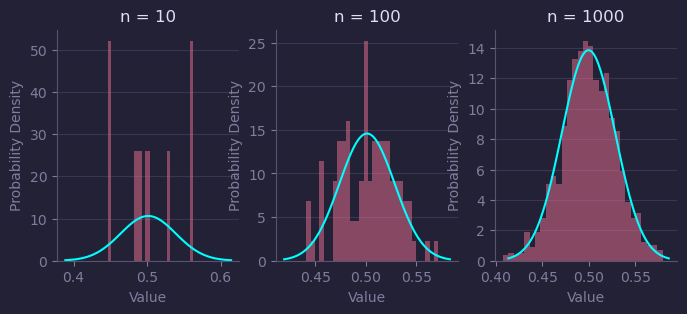

In [7]:
num_samples = [10, 100, 1000]
sample_size = 100

x = np.linspace(0.01, 10, 100)
fig = plt.figure(figsize=(8,3))

for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    samples = np.random.uniform(0,1, size=(num_samples[i], sample_size))
    means = np.mean(samples, axis=1)
    ax.hist(means, bins=30, density=True, alpha=0.5, label='Means of Samples')
    mean = np.mean(means)
    std = np.std(means)
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    y = sc.stats.norm.pdf(x, loc=mean, scale=std)
    ax.plot(x, y, 'cyan', label='Normal Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'n = {num_samples[i]}')

**Observation**:
- Increasing the number of samples makes the uniform distribution increasingly normal.

### 7. Chi-Square Distributions

#### 7.1. Definition

Let *X* follow a gamma distribution with $\theta = 2$ and $\alpha = \frac{r}{2}$, where *r* is a positive integer. Then the probability density function of *X* is:
$$f(x)= \frac{1}{\Gamma (r/2) 2^{r/2}}x^{r/2-1}e^{-x/2}$$
for x>0. We say that *X* follows a chi-square distribution with ***r* degrees of freedom**, denoted $\chi^2(r)$.

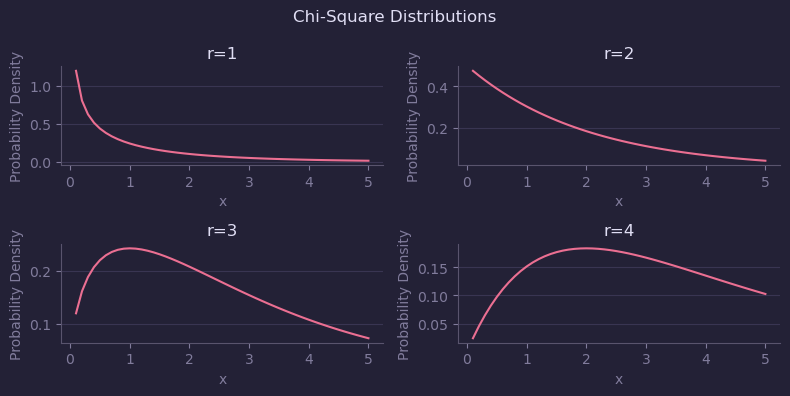

In [ ]:
f = lambda x, r: (x**(r/2-1)*np.exp(-x/2))/(sc.special.gamma(r/2) * 2**(r/2))
t = np.arange(0.1, 5.1, 0.1)

fig = plt.figure(figsize=(8,4), tight_layout=True)
fig.suptitle('Chi-Square Distributions')
for i in range(1, 5):
    ax = fig.add_subplot(2,2,i)
    ax.plot(t, f(t, i))
    ax.set_title(f'r={i}')
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')

Observation:
- Increasing degrees of freedoms *r* shifts the distribution from a right skewed to a symmetric one.

#### 7.2. Moment Generating Function

Putting $\theta=2$ and $\alpha=r/2$ in moment generating function of Gamma distribution:
$$ M(t) = \frac{1}{(1-2t)^{r/2}}$$

#### 7.3 Mean and Variance

Mean of Gamma distribution is $\mu = \alpha\theta$<br>
Therefore the mean of Chi-squared distribution is $\mu = \frac{r}{2} \times 2 = r$
<br><br>Similarly Variance of gamma distribution is $\sigma^2 = \alpha\theta^2$<br>
Therefore the variance of Chi-squared distribution is $\sigma^2 = \frac{r}{2}\times 2^2 = 2r$ 

#### 7.5 Relation with Nomral Distribution

Chi-squared distribution can be thought of as (approximation) the "square" of a selction taken from a standard normal distribution. <br>
Consider $Z_1 \sim N(0,1)$ than $Q=Z_1^2$

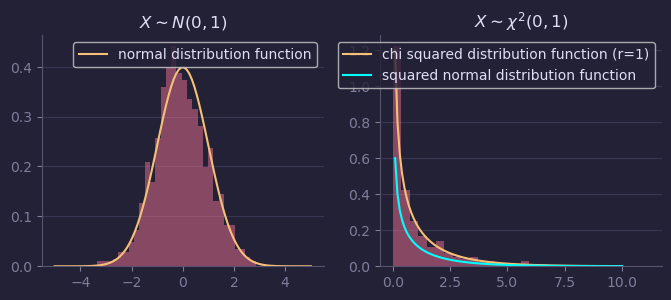

In [46]:
normal_samples = np.random.normal(loc=0, scale=1, size=(1000, ))
squared_samples = normal_samples ** 2

fig = plt.figure(figsize=(8,3))
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    if i == 0:
        x = np.linspace(-5,5,100)
        y_normal = sc.stats.norm.pdf(x, loc=0, scale=1)
        ax.hist(normal_samples, bins=30, density=True, alpha=0.5)
        ax.plot(x, y_normal, label='normal distribution function')
        ax.set_title(r'$X\sim N(0,1)$')

    elif i == 1:
        x = np.linspace(0.1,10,100)
        y = sc.stats.chi2.pdf(x, df=1)
        ax.hist(squared_samples, bins=30, density=True, alpha=0.5)  
        ax.plot(x,y, label='chi squared distribution function (r=1)')
        ax.set_title(r'$X\sim \chi^2(0,1)$')
        # taking square root of pdf of chi squared distribition and rescaling
        y_squared_normal = sc.stats.norm.pdf(np.sqrt(x), loc=0, scale=1) / (2*np.sqrt(x))
        ax.plot(x, y_squared_normal, color='cyan', label='squared normal distribution function')
    
    ax.legend()

**Observation**:
- For data sampled from normal distribution, the square of the data follows a chi-squared distribution.